# Exercício 9 de Análise de Componentes Independentes
Pedro Bandeira de Mello Martins

CPE 782 - Análise de Componentes Independentes



Análise feita para 1000 amostras

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro

%matplotlib inline
from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

#Notes:
#SHAPIRO: The algorithm used is described in [R634] but censoring parameters as 
#        described are not implemented. For N > 5000 the W test statistic is 
#        accurate but the p-value may not be.

In [5]:
learning_rate = 1e-6
gaussian_distribution = np.random.normal(0,1,1000)
shapiro(np.random.uniform(-1,1,1000))

(0.9530802369117737, 2.4544194125540818e-17)

In [6]:
filePath = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/NinthMixture1000Stats.txt'
distDataFrame = pd.read_table(filePath, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.T.head())

          0         1         2
0  0.295410  1.151799 -1.734433
1  4.383694  2.772077 -5.126869
2  4.326665  2.726403 -5.152498
3  4.269663  2.680744 -5.178100
4  4.212701  2.635105 -5.203661


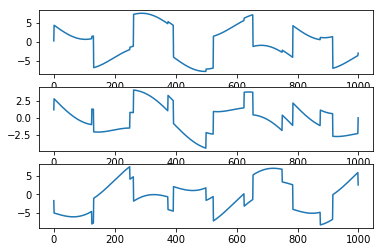

In [8]:
fig, axes = plt.subplots(3,1)
axes[0].plot(mixtures[0])
axes[1].plot(mixtures[1])
axes[2].plot(mixtures[2])

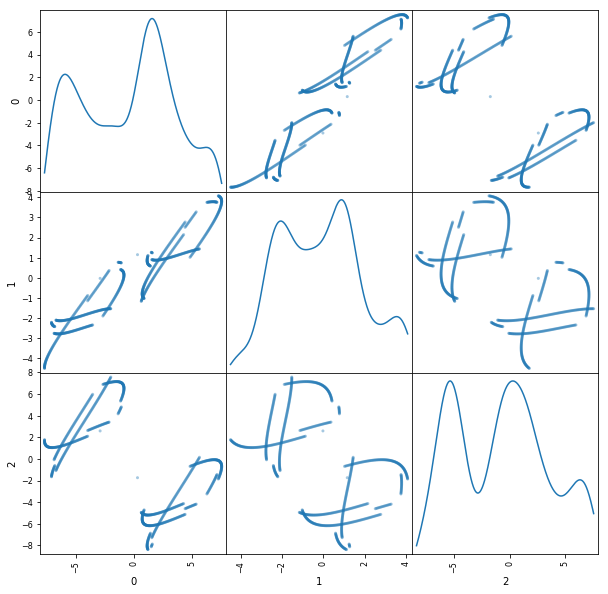

In [4]:
scatter_matrix(distDataFrame.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [5]:
resultsTable(mixtures)

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.5952,0.9498,5.9562e-18
1,0,0.2878,0.9761,9.0163e-12
2,0,0.792,0.9521,1.6107e-17


## NPCA-RLS Algorithm

In [19]:
[yNPCA, WNPCA] = NPCA_RLS(mixtures,beta = 0.99998, runs = 10)

Execution time: 0.4181089401245117 seconds


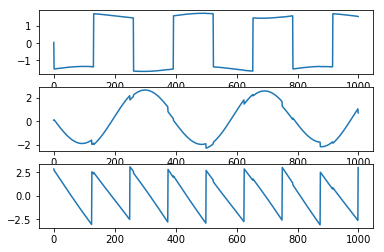

In [20]:
fig, axes = plt.subplots(3,1)
axes[0].plot(yNPCA[0])
axes[1].plot(yNPCA[1])
axes[2].plot(yNPCA[2])

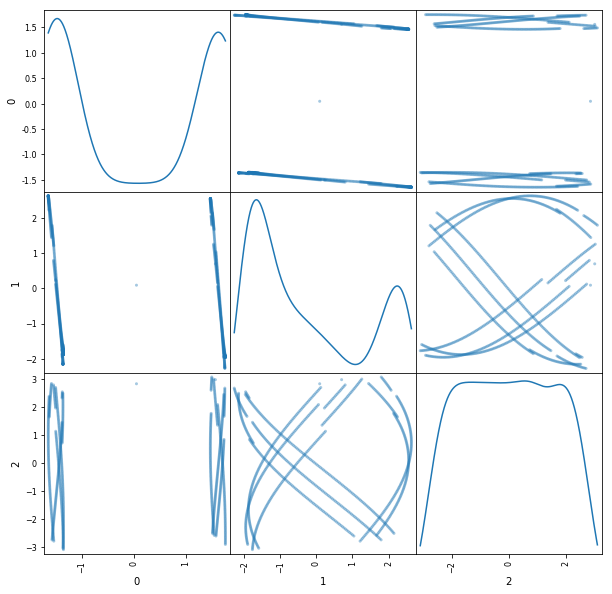

In [21]:
scatter_matrix(pd.DataFrame(yNPCA.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.6718,3.2257,0.6925,3.4067e-39
1,0,1.2659,0.9002,5.4452e-25
2,0,0.464,0.961,1.069e-15


C:\Users\Pedro Bandeira\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


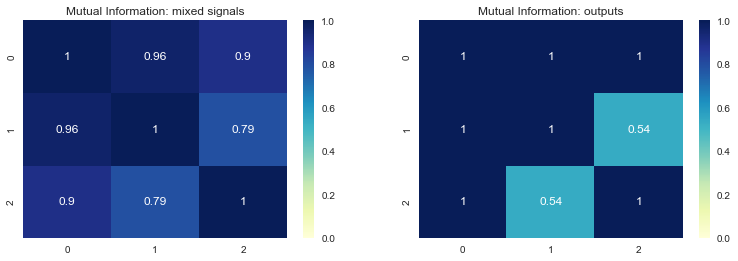

In [22]:
resultsTable(yNPCA)
plot_MutualInformation(mixtures, y = yNPCA, KDE = True)

## Chichocki-Unbehauen Algorithm Feedback network

In [29]:
[yFeedback, WFeedback] = cichocki_Feedback(mixtures, learningRate = 1e-7, decayRate = 1e-5, runs  = 1) 

Execution time: 0.08221912384033203 seconds


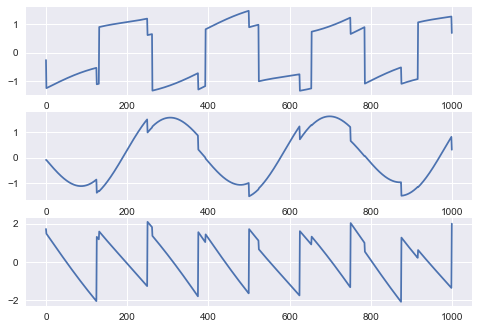

In [30]:
fig, axes = plt.subplots(3,1)
axes[0].plot(yFeedback[0])
axes[1].plot(yFeedback[1])
axes[2].plot(yFeedback[2])

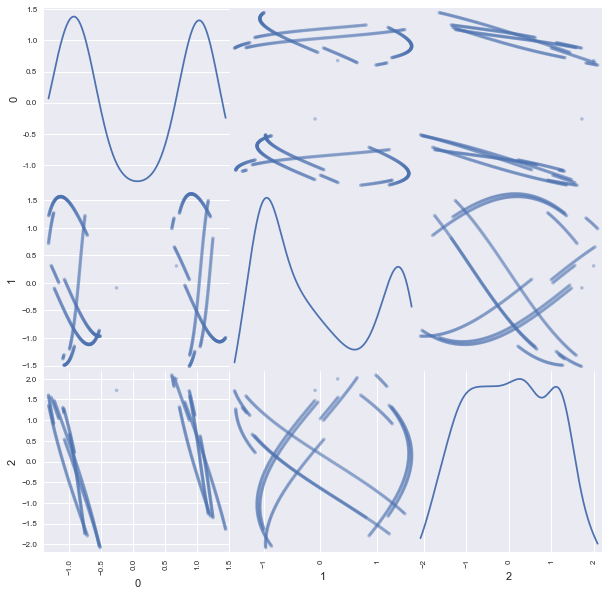

In [31]:
scatter_matrix(pd.DataFrame(yFeedback.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.1412,1.9966,0.8011,2.6782e-33
1,0,1.3639,0.9048,1.8243e-24
2,0,0.4033,0.9744,2.753e-12


C:\Users\Pedro Bandeira\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


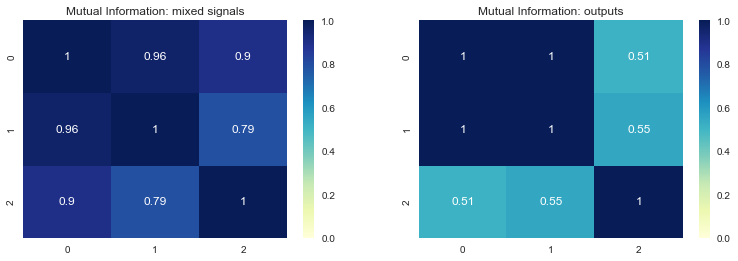

In [32]:
resultsTable(yFeedback)
plot_MutualInformation(mixtures, y = yFeedback, KDE = True)

## Chichocki-Unbehauen Algorithm Feedforward network

In [34]:
[yFeedforward, WFeedforward] = cichocki_Feedforward(mixtures, learningRate = 1e-6, runs = 1)

Execution time: 0.055146217346191406 seconds


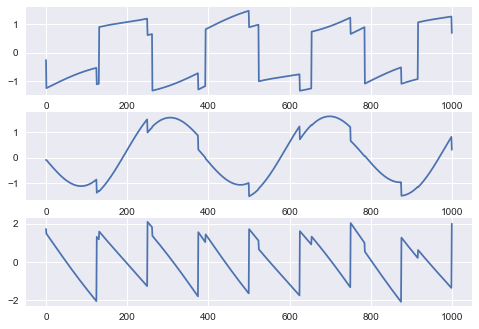

In [35]:
fig, axes = plt.subplots(3,1)
axes[0].plot(yFeedforward[0])
axes[1].plot(yFeedforward[1])
axes[2].plot(yFeedforward[2])

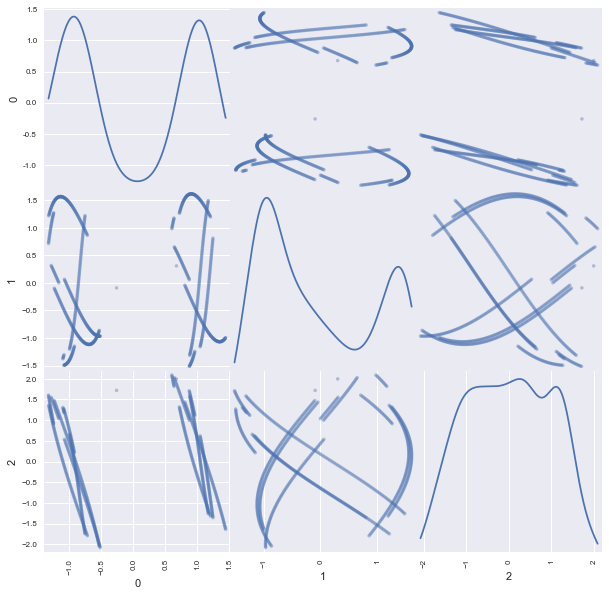

In [36]:
scatter_matrix(pd.DataFrame(yFeedforward.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,2.1092,0.8011,2.6785e-33
1,0,1.4188,0.9048,1.8251e-24
2,0,0.2879,0.9744,2.7511e-12


C:\Users\Pedro Bandeira\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


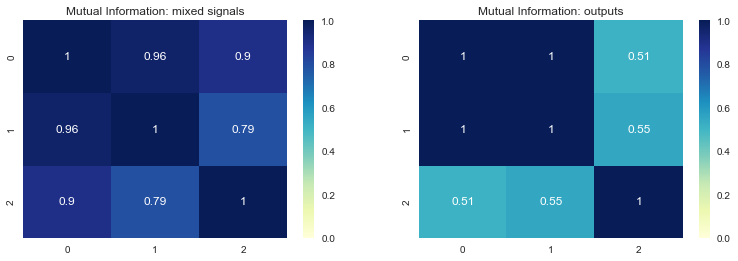

In [37]:
resultsTable(yFeedforward)
plot_MutualInformation(mixtures, y = yFeedforward, KDE = True)